#  Question 1 

#   Neural Netwok for Gas Turbines

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [2]:
gas_turbine = pd.read_csv("gas_turbines.csv")
gas_turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


###  Preprocessing the dataset 

In [3]:
gas_turbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [4]:
gas_turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
x = gas_turbine.drop(["TEY"],axis=1).values
y = gas_turbine.iloc[:,7].values

In [6]:
x

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [7]:
y

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

###   The y variable is continuous in nature so it is a regression problem

###   Splitting the dataset

In [9]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=10)

In [10]:
X_train.shape

(11279, 10)

In [11]:
x_train= StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

###  The goal is to predict turbine energy yield(TEY) which is a continuous value. So its a probem of regression. So, here we are using mean absolute error loss function because it is more robust to outliers than mean sqaured error .Inorder to keep track of the other errors we set other two metrics which are mean squared error (mse) and mean absolute percentage error (mape).

###   Building the model 

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu',input_shape=(10,)))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

###  Compiling the model

In [13]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse', 'mape'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________


###   Fitting the model

In [15]:
history = model.fit(x_train, y_train, epochs=150, batch_size=32,validation_split=0.25)

Epoch 1/150
265/265 [==============================] - 11s 43ms/step - loss: 133.5775 - mse: 18091.6094 - mape: 99.4341 - val_loss: 133.0027 - val_mse: 17945.9863 - val_mape: 99.2475
Epoch 2/150
265/265 [==============================] - 2s 7ms/step - loss: 133.3292 - mse: 18025.3516 - mape: 99.2468 - val_loss: 132.9973 - val_mse: 17944.5625 - val_mape: 99.2435
Epoch 3/150
265/265 [==============================] - 2s 6ms/step - loss: 133.3275 - mse: 18024.8828 - mape: 99.2455 - val_loss: 132.9969 - val_mse: 17944.4434 - val_mape: 99.2431
Epoch 4/150
265/265 [==============================] - 1s 5ms/step - loss: 133.3272 - mse: 18024.8066 - mape: 99.2453 - val_loss: 132.9968 - val_mse: 17944.4062 - val_mape: 99.2430
Epoch 5/150
265/265 [==============================] - 1s 4ms/step - loss: 133.3271 - mse: 18024.7793 - mape: 99.2452 - val_loss: 132.9967 - val_mse: 17944.3867 - val_mape: 99.2429
Epoch 6/150
265/265 [==============================] - 1s 4ms/step - loss: 133.3271 - mse: 18

265/265 [==============================] - 1s 4ms/step - loss: 133.3270 - mse: 18024.7461 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 47/150
265/265 [==============================] - 1s 3ms/step - loss: 133.3270 - mse: 18024.7461 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 48/150
265/265 [==============================] - 1s 3ms/step - loss: 133.3270 - mse: 18024.7441 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 49/150
265/265 [==============================] - 1s 3ms/step - loss: 133.3270 - mse: 18024.7422 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 50/150
265/265 [==============================] - 1s 3ms/step - loss: 133.3270 - mse: 18024.7441 - mape: 99.2452 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 51/150
265/265 [==============================] - 1s 4ms/step - loss: 133.3270 - mse: 18024.7422 

Epoch 136/150
265/265 [==============================] - 1s 3ms/step - loss: 133.3270 - mse: 18024.7363 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 137/150
265/265 [==============================] - 1s 2ms/step - loss: 133.3270 - mse: 18024.7441 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 138/150
265/265 [==============================] - 1s 2ms/step - loss: 133.3270 - mse: 18024.7480 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 139/150
265/265 [==============================] - 1s 2ms/step - loss: 133.3270 - mse: 18024.7500 - mape: 99.2450 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 140/150
265/265 [==============================] - 1s 2ms/step - loss: 133.3270 - mse: 18024.7500 - mape: 99.2451 - val_loss: 132.9967 - val_mse: 17944.3613 - val_mape: 99.2429
Epoch 141/150
265/265 [==============================] - 1s 3ms/step - loss: 133.3270

###  Evaluating the model 

In [16]:
scores = model.evaluate(x_train, y_train)
print("loss:", scores[0])
print("mean_squared_error:", scores[1])
print("mean_absolute_percentage_error:", scores[2])

353/353 [==============================] - 2s 6ms/step - loss: 133.2444 - mse: 18004.6504 - mape: 99.2445
loss: 133.24441528320312
mean_squared_error: 18004.650390625
mean_absolute_percentage_error: 99.24451446533203


###  Predicting the training model 

In [17]:
pred_train = model.predict(x_train)
print(mean_squared_error(y_train,pred_train))
print(np.sqrt(mean_squared_error(y_train,pred_train)))
print(mean_absolute_percentage_error(y_train,pred_train))

18004.647721571062
134.1813985676519
0.9924454923885621


###  Predicting the testing model 

In [18]:
pred_test = model.predict(x_test)
print(mean_squared_error(y_test,pred_test))
print(np.sqrt(mean_squared_error(y_test,pred_test)))
print(mean_absolute_percentage_error(y_test,pred_test))

17944.981718249877
133.9588806994515
0.9924326198339695


###   The output shows the mean squared error for both the train and test. The mean squared error is too high for both. 

###  Visualization of training and testing set 

In [19]:
history.history.keys()

dict_keys(['loss', 'mse', 'mape', 'val_loss', 'val_mse', 'val_mape'])

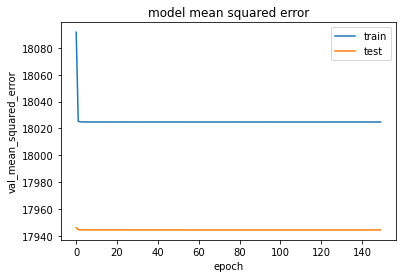

In [20]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('val_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

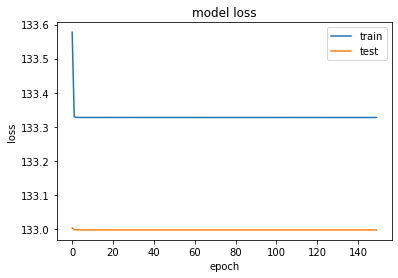

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

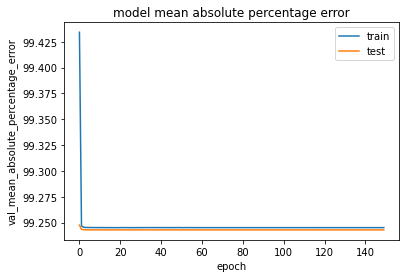

In [22]:
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model mean absolute percentage error')
plt.ylabel('val_mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#   Tuning Hyperparameter 

In [23]:
data = StandardScaler().fit_transform(x)
data

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [24]:
pd.DataFrame(data).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16,1.511894e-16,-7.559468e-17,-3.260021e-15,1.640405e-15,1.965462e-16,3.779734e-17,4.233302e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


###    1) Batch Size and Epochs

In [25]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam 

###  Build the model 

In [26]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu',input_shape=(10,)))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse','mape'])
    return model

In [27]:
model = KerasRegressor(build_fn = create_model,verbose = 0)

###  Define the grid search parameters

In [28]:
batch_size = [5,16,32,64,70,128]
epochs = [15,50,80,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START batch_size=5, epochs=15....................................
[CV 1/5; 1/24] END ..................batch_size=5, epochs=15; total time=  57.4s
[CV 2/5; 1/24] START batch_size=5, epochs=15....................................
[CV 2/5; 1/24] END ..................batch_size=5, epochs=15; total time= 1.1min
[CV 3/5; 1/24] START batch_size=5, epochs=15....................................
[CV 3/5; 1/24] END ..................batch_size=5, epochs=15; total time=  49.8s
[CV 4/5; 1/24] START batch_size=5, epochs=15....................................
[CV 4/5; 1/24] END ..................batch_size=5, epochs=15; total time= 1.1min
[CV 5/5; 1/24] START batch_size=5, epochs=15....................................
[CV 5/5; 1/24] END ..................batch_size=5, epochs=15; total time=  48.6s
[CV 1/5; 2/24] START batch_size=5, epochs=50....................................
[CV 1/5; 2/24] END ..................batch_size

[CV 1/5; 11/24] END ................batch_size=32, epochs=80; total time= 1.2min
[CV 2/5; 11/24] START batch_size=32, epochs=80..................................
[CV 2/5; 11/24] END ................batch_size=32, epochs=80; total time= 1.2min
[CV 3/5; 11/24] START batch_size=32, epochs=80..................................
[CV 3/5; 11/24] END ................batch_size=32, epochs=80; total time= 1.2min
[CV 4/5; 11/24] START batch_size=32, epochs=80..................................
[CV 4/5; 11/24] END ................batch_size=32, epochs=80; total time= 1.3min
[CV 5/5; 11/24] START batch_size=32, epochs=80..................................
[CV 5/5; 11/24] END ................batch_size=32, epochs=80; total time= 1.2min
[CV 1/5; 12/24] START batch_size=32, epochs=100.................................
[CV 1/5; 12/24] END ...............batch_size=32, epochs=100; total time= 1.5min
[CV 2/5; 12/24] START batch_size=32, epochs=100.................................
[CV 2/5; 12/24] END ........

[CV 2/5; 21/24] END ...............batch_size=128, epochs=15; total time=   7.1s
[CV 3/5; 21/24] START batch_size=128, epochs=15.................................
[CV 3/5; 21/24] END ...............batch_size=128, epochs=15; total time=   7.1s
[CV 4/5; 21/24] START batch_size=128, epochs=15.................................
[CV 4/5; 21/24] END ...............batch_size=128, epochs=15; total time=   6.5s
[CV 5/5; 21/24] START batch_size=128, epochs=15.................................
[CV 5/5; 21/24] END ...............batch_size=128, epochs=15; total time=   7.2s
[CV 1/5; 22/24] START batch_size=128, epochs=50.................................
[CV 1/5; 22/24] END ...............batch_size=128, epochs=50; total time=  15.7s
[CV 2/5; 22/24] START batch_size=128, epochs=50.................................
[CV 2/5; 22/24] END ...............batch_size=128, epochs=50; total time=  15.1s
[CV 3/5; 22/24] START batch_size=128, epochs=50.................................
[CV 3/5; 22/24] END ........

### Build and fit the GridSearchCV

In [29]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -133.1882751464844, using {'batch_size': 128, 'epochs': 100}
-133.18830261230468,3.1143041451555216 with: {'batch_size': 5, 'epochs': 15}
-133.18830261230468,3.1143041451555216 with: {'batch_size': 5, 'epochs': 50}
-133.18830261230468,3.1143041451555216 with: {'batch_size': 5, 'epochs': 80}
-133.18830261230468,3.1143041451555216 with: {'batch_size': 5, 'epochs': 100}
-133.18828125,3.1142867809837154 with: {'batch_size': 16, 'epochs': 15}
-133.1882781982422,3.1142851005792918 with: {'batch_size': 16, 'epochs': 50}
-133.1882781982422,3.1142851005792918 with: {'batch_size': 16, 'epochs': 80}
-133.1882781982422,3.1142851005792918 with: {'batch_size': 16, 'epochs': 100}
-133.18829040527345,3.1142666122698572 with: {'batch_size': 32, 'epochs': 15}
-133.18829040527345,3.1142666122698572 with: {'batch_size': 32, 'epochs': 50}
-133.18829040527345,3.1142666122698572 with: {'batch_size': 32, 'epochs': 80}
-133.18829040527345,3.1142666122698572 with: {'batch_size': 32, 'epochs': 100}
-133.1

###    2) Optimization Algorithm 

In [62]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

###  Build the model

In [66]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu',input_shape=(10,)))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mse','mape'])
    return model

In [67]:
model = KerasRegressor(build_fn = create_model,verbose = 0,epochs=150, batch_size=32)

###  Define the grid search parameters

In [68]:
optimizer = ['SGD', 'RMSprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START optimizer=SGD...............................................
[CV 1/5; 1/7] END .............................optimizer=SGD; total time= 1.6min
[CV 2/5; 1/7] START optimizer=SGD...............................................
[CV 2/5; 1/7] END .............................optimizer=SGD; total time= 1.4min
[CV 3/5; 1/7] START optimizer=SGD...............................................
[CV 3/5; 1/7] END .............................optimizer=SGD; total time= 1.3min
[CV 4/5; 1/7] START optimizer=SGD...............................................
[CV 4/5; 1/7] END .............................optimizer=SGD; total time= 1.2min
[CV 5/5; 1/7] START optimizer=SGD...............................................
[CV 5/5; 1/7] END .............................optimizer=SGD; total time= 1.2min
[CV 1/5; 2/7] START optimizer=RMSprop...........................................
[CV 1/5; 2/7] END .........................optimi

###   Summarize results

In [69]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -133.18829040527345, using {'optimizer': 'RMSprop'}
-133.18857116699218,3.1142811386524327 with: {'optimizer': 'SGD'}
-133.18829040527345,3.1142666122698572 with: {'optimizer': 'RMSprop'}
-133.1941162109375,3.1145321322757633 with: {'optimizer': 'adagrad'}
-133.1913299560547,3.1139241054279627 with: {'optimizer': 'adadelta'}
-133.18829040527345,3.1142666122698572 with: {'optimizer': 'adam'}
-133.18829040527345,3.1142666122698572 with: {'optimizer': 'adamax'}
-133.18829040527345,3.1142666122698572 with: {'optimizer': 'nadam'}


###    3) Learning rate and Momentum

In [70]:
from keras.optimizers import SGD

###   Defining the model

In [71]:
def create_model(learning_rate, momentum):
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu',input_shape=(10,)))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mse','mape'])
    return model

In [72]:
model = KerasRegressor(build_fn = create_model, verbose = 0,batch_size =32 ,epochs = 150)

###  Define the grid search parameters

In [73]:
learning_rate = [0.001,0.01,0.1,0.2,0.4]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grids = dict(learning_rate = learning_rate,momentum = momentum)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START learning_rate=0.001, momentum=0.0..........................
[CV 1/5; 1/30] END ........learning_rate=0.001, momentum=0.0; total time= 2.2min
[CV 2/5; 1/30] START learning_rate=0.001, momentum=0.0..........................
[CV 2/5; 1/30] END ........learning_rate=0.001, momentum=0.0; total time= 2.1min
[CV 3/5; 1/30] START learning_rate=0.001, momentum=0.0..........................
[CV 3/5; 1/30] END ........learning_rate=0.001, momentum=0.0; total time= 2.0min
[CV 4/5; 1/30] START learning_rate=0.001, momentum=0.0..........................
[CV 4/5; 1/30] END ........learning_rate=0.001, momentum=0.0; total time= 2.1min
[CV 5/5; 1/30] START learning_rate=0.001, momentum=0.0..........................
[CV 5/5; 1/30] END ........learning_rate=0.001, momentum=0.0; total time= 2.0min
[CV 1/5; 2/30] START learning_rate=0.001, momentum=0.2..........................
[CV 1/5; 2/30] END ........learning_rate=0.001,

[CV 1/5; 11/30] END ........learning_rate=0.01, momentum=0.8; total time= 2.2min
[CV 2/5; 11/30] START learning_rate=0.01, momentum=0.8..........................
[CV 2/5; 11/30] END ........learning_rate=0.01, momentum=0.8; total time= 2.2min
[CV 3/5; 11/30] START learning_rate=0.01, momentum=0.8..........................
[CV 3/5; 11/30] END ........learning_rate=0.01, momentum=0.8; total time= 2.2min
[CV 4/5; 11/30] START learning_rate=0.01, momentum=0.8..........................
[CV 4/5; 11/30] END ........learning_rate=0.01, momentum=0.8; total time= 2.3min
[CV 5/5; 11/30] START learning_rate=0.01, momentum=0.8..........................
[CV 5/5; 11/30] END ........learning_rate=0.01, momentum=0.8; total time= 2.1min
[CV 1/5; 12/30] START learning_rate=0.01, momentum=0.9..........................
[CV 1/5; 12/30] END ........learning_rate=0.01, momentum=0.9; total time= 2.2min
[CV 2/5; 12/30] START learning_rate=0.01, momentum=0.9..........................
[CV 2/5; 12/30] END ........

[CV 2/5; 21/30] END .........learning_rate=0.2, momentum=0.4; total time= 2.1min
[CV 3/5; 21/30] START learning_rate=0.2, momentum=0.4...........................
[CV 3/5; 21/30] END .........learning_rate=0.2, momentum=0.4; total time= 2.2min
[CV 4/5; 21/30] START learning_rate=0.2, momentum=0.4...........................
[CV 4/5; 21/30] END .........learning_rate=0.2, momentum=0.4; total time= 2.2min
[CV 5/5; 21/30] START learning_rate=0.2, momentum=0.4...........................
[CV 5/5; 21/30] END .........learning_rate=0.2, momentum=0.4; total time= 2.1min
[CV 1/5; 22/30] START learning_rate=0.2, momentum=0.6...........................
[CV 1/5; 22/30] END .........learning_rate=0.2, momentum=0.6; total time= 2.2min
[CV 2/5; 22/30] START learning_rate=0.2, momentum=0.6...........................
[CV 2/5; 22/30] END .........learning_rate=0.2, momentum=0.6; total time= 2.3min
[CV 3/5; 22/30] START learning_rate=0.2, momentum=0.6...........................
[CV 3/5; 22/30] END ........

###  Summarize the results

In [74]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -133.18829040527345, using {'learning_rate': 0.1, 'momentum': 0.4}
-133.19943542480468,3.1145394740723087 with: {'learning_rate': 0.001, 'momentum': 0.0}
-133.1961669921875,3.1146454087677604 with: {'learning_rate': 0.001, 'momentum': 0.2}
-133.19296569824218,3.1145328281783304 with: {'learning_rate': 0.001, 'momentum': 0.4}
-133.19091796875,3.1141310684882595 with: {'learning_rate': 0.001, 'momentum': 0.6}
-133.18896484375,3.114284784634438 with: {'learning_rate': 0.001, 'momentum': 0.8}
-133.18854370117188,3.114241896753441 with: {'learning_rate': 0.001, 'momentum': 0.9}
-133.18854370117188,3.114266048099326 with: {'learning_rate': 0.01, 'momentum': 0.0}
-133.1884796142578,3.1142737292417992 with: {'learning_rate': 0.01, 'momentum': 0.2}
-133.1884338378906,3.1142601132556336 with: {'learning_rate': 0.01, 'momentum': 0.4}
-133.1883758544922,3.114248000174657 with: {'learning_rate': 0.01, 'momentum': 0.6}
-133.1883117675781,3.114271818164207 with: {'learning_rate': 0.01, 'moment

###   4)  Activation Function and Kernel Initializer

###  Defining the model

In [82]:
def create_model(activation,kernal_initializer):
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer=kernal_initializer, activation= activation,input_shape=(10,)))
    model.add(Dense(8, kernel_initializer=kernal_initializer, activation=activation))
    model.add(Dense(8, kernel_initializer=kernal_initializer, activation=activation))
    model.add(Dense(1, kernel_initializer=kernal_initializer, activation=activation))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse','mape'])
    return model

In [83]:
model = KerasRegressor(build_fn = create_model, verbose = 0, batch_size =32, epochs = 150)

###  Define the grid search parameters

In [85]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
kernal_initializer = ['uniform', 'normal', 'zero',]
param_grids = dict(activation = activation, kernal_initializer = kernal_initializer)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 1/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time= 1.8min
[CV 2/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 2/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time= 1.9min
[CV 3/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 3/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time= 2.2min
[CV 4/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 4/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time= 2.3min
[CV 5/5; 1/24] START activation=softmax, kernal_initializer=uniform.............
[CV 5/5; 1/24] END activation=softmax, kernal_initializer=uniform; total time= 2.3min
[CV 1/5; 2/24] START activation=softmax, kernal_initializer=normal..............
[CV 1/5; 2/24] END act

[CV 5/5; 10/24] END activation=relu, kernal_initializer=uniform; total time= 2.2min
[CV 1/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 1/5; 11/24] END activation=relu, kernal_initializer=normal; total time= 2.2min
[CV 2/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 2/5; 11/24] END activation=relu, kernal_initializer=normal; total time=36.6min
[CV 3/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 3/5; 11/24] END activation=relu, kernal_initializer=normal; total time= 1.5min
[CV 4/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 4/5; 11/24] END activation=relu, kernal_initializer=normal; total time= 2.4min
[CV 5/5; 11/24] START activation=relu, kernal_initializer=normal................
[CV 5/5; 11/24] END activation=relu, kernal_initializer=normal; total time= 2.2min
[CV 1/5; 12/24] START activation=relu, kernal_initializer=zero..................
[CV 1/5; 12/24]

[CV 5/5; 20/24] END activation=hard_sigmoid, kernal_initializer=normal; total time= 2.6min
[CV 1/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 1/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time= 2.9min
[CV 2/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 2/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time=24.9min
[CV 3/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 3/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time= 1.5min
[CV 4/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 4/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time= 2.7min
[CV 5/5; 21/24] START activation=hard_sigmoid, kernal_initializer=zero..........
[CV 5/5; 21/24] END activation=hard_sigmoid, kernal_initializer=zero; total time= 2.4min
[CV 1/5; 22/24] START activation=linear, kernal_initializer

###  Summarize the results

In [86]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.572439181804657, using {'activation': 'linear', 'kernal_initializer': 'uniform'}
-133.18829040527345,3.1142666122698572 with: {'activation': 'softmax', 'kernal_initializer': 'uniform'}
-133.18829040527345,3.1142666122698572 with: {'activation': 'softmax', 'kernal_initializer': 'normal'}
-133.18829040527345,3.1142666122698572 with: {'activation': 'softmax', 'kernal_initializer': 'zero'}
-0.7351341605186462,0.15338126766500826 with: {'activation': 'softplus', 'kernal_initializer': 'uniform'}
-0.6805077433586121,0.13229655478475347 with: {'activation': 'softplus', 'kernal_initializer': 'normal'}
-0.5940892815589904,0.03335711666003537 with: {'activation': 'softplus', 'kernal_initializer': 'zero'}
-133.190771484375,3.1142847715002224 with: {'activation': 'softsign', 'kernal_initializer': 'uniform'}
-133.19076232910157,3.1142915011306638 with: {'activation': 'softsign', 'kernal_initializer': 'normal'}
-133.20858764648438,3.1142855579441746 with: {'activation': 'softsign', 'kernal_

###   5) Dropout Rate 

In [87]:
from keras.layers import Dropout

###    Defining the model

In [88]:
def create_model(dropout_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu',input_shape=(10,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse','mape'])
    return model

In [89]:
model = KerasRegressor(build_fn = create_model, verbose = 0, batch_size =32, epochs = 150)

###  Define the grid search parameters

In [90]:
dropout_rate = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
param_grid = dict(dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START dropout_rate=0.0...........................................
[CV 1/5; 1/10] END .........................dropout_rate=0.0; total time= 2.6min
[CV 2/5; 1/10] START dropout_rate=0.0...........................................
[CV 2/5; 1/10] END .........................dropout_rate=0.0; total time= 2.6min
[CV 3/5; 1/10] START dropout_rate=0.0...........................................
[CV 3/5; 1/10] END .........................dropout_rate=0.0; total time= 2.7min
[CV 4/5; 1/10] START dropout_rate=0.0...........................................
[CV 4/5; 1/10] END .........................dropout_rate=0.0; total time= 1.5min
[CV 5/5; 1/10] START dropout_rate=0.0...........................................
[CV 5/5; 1/10] END .........................dropout_rate=0.0; total time= 2.2min
[CV 1/5; 2/10] START dropout_rate=0.1...........................................
[CV 1/5; 2/10] END .........................drop

###  Summarize the results

In [91]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
     print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -133.18829040527345, using {'dropout_rate': 0.0}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.0}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.1}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.2}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.3}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.4}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.5}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.6}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.7}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.8}
-133.18829040527345,3.1142666122698572 with: {'dropout_rate': 0.9}


###    6) Number of Neurons in activation layer 

In [96]:
def create_model(neuron1,neuron2,neuron3):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=10, kernel_initializer='uniform', activation='relu',input_shape=(10,)))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron3, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse','mape'])
    return model

In [97]:
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 32,epochs = 150)

###  Define the grid search parameters

In [100]:
neuron1 = [8,10,12]
neuron2 = [6,8,10]
neuron3 = [4,6,8]
param_grids = dict(neuron1 = neuron1, neuron2 = neuron2, neuron3 = neuron3)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(data,y) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=8, neuron2=6, neuron3=4............................
[CV 1/5; 1/27] END ..........neuron1=8, neuron2=6, neuron3=4; total time= 2.6min
[CV 2/5; 1/27] START neuron1=8, neuron2=6, neuron3=4............................
[CV 2/5; 1/27] END ..........neuron1=8, neuron2=6, neuron3=4; total time= 2.6min
[CV 3/5; 1/27] START neuron1=8, neuron2=6, neuron3=4............................
[CV 3/5; 1/27] END ..........neuron1=8, neuron2=6, neuron3=4; total time= 2.6min
[CV 4/5; 1/27] START neuron1=8, neuron2=6, neuron3=4............................
[CV 4/5; 1/27] END ..........neuron1=8, neuron2=6, neuron3=4; total time= 2.5min
[CV 5/5; 1/27] START neuron1=8, neuron2=6, neuron3=4............................
[CV 5/5; 1/27] END ..........neuron1=8, neuron2=6, neuron3=4; total time= 2.5min
[CV 1/5; 2/27] START neuron1=8, neuron2=6, neuron3=6............................
[CV 1/5; 2/27] END ..........neuron1=8, neuron2

[CV 1/5; 11/27] END ........neuron1=10, neuron2=6, neuron3=6; total time= 2.6min
[CV 2/5; 11/27] START neuron1=10, neuron2=6, neuron3=6..........................
[CV 2/5; 11/27] END ........neuron1=10, neuron2=6, neuron3=6; total time= 2.6min
[CV 3/5; 11/27] START neuron1=10, neuron2=6, neuron3=6..........................
[CV 3/5; 11/27] END ........neuron1=10, neuron2=6, neuron3=6; total time= 2.7min
[CV 4/5; 11/27] START neuron1=10, neuron2=6, neuron3=6..........................
[CV 4/5; 11/27] END ........neuron1=10, neuron2=6, neuron3=6; total time= 2.6min
[CV 5/5; 11/27] START neuron1=10, neuron2=6, neuron3=6..........................
[CV 5/5; 11/27] END ........neuron1=10, neuron2=6, neuron3=6; total time= 2.4min
[CV 1/5; 12/27] START neuron1=10, neuron2=6, neuron3=8..........................
[CV 1/5; 12/27] END ........neuron1=10, neuron2=6, neuron3=8; total time= 2.7min
[CV 2/5; 12/27] START neuron1=10, neuron2=6, neuron3=8..........................
[CV 2/5; 12/27] END ........

[CV 2/5; 21/27] END ........neuron1=12, neuron2=6, neuron3=8; total time= 2.4min
[CV 3/5; 21/27] START neuron1=12, neuron2=6, neuron3=8..........................
[CV 3/5; 21/27] END ........neuron1=12, neuron2=6, neuron3=8; total time= 2.6min
[CV 4/5; 21/27] START neuron1=12, neuron2=6, neuron3=8..........................
[CV 4/5; 21/27] END ........neuron1=12, neuron2=6, neuron3=8; total time=51.0min
[CV 5/5; 21/27] START neuron1=12, neuron2=6, neuron3=8..........................
[CV 5/5; 21/27] END ........neuron1=12, neuron2=6, neuron3=8; total time= 1.6min
[CV 1/5; 22/27] START neuron1=12, neuron2=8, neuron3=4..........................
[CV 1/5; 22/27] END ........neuron1=12, neuron2=8, neuron3=4; total time= 2.5min
[CV 2/5; 22/27] START neuron1=12, neuron2=8, neuron3=4..........................
[CV 2/5; 22/27] END ........neuron1=12, neuron2=8, neuron3=4; total time= 2.6min
[CV 3/5; 22/27] START neuron1=12, neuron2=8, neuron3=4..........................
[CV 3/5; 22/27] END ........

###    Summarize the results

In [101]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -133.18829040527345, using {'neuron1': 8, 'neuron2': 6, 'neuron3': 4}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 6, 'neuron3': 4}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 6, 'neuron3': 6}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 6, 'neuron3': 8}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 8, 'neuron3': 4}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 8, 'neuron3': 6}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 8, 'neuron3': 8}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 10, 'neuron3': 4}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 10, 'neuron3': 6}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 8, 'neuron2': 10, 'neuron3': 8}
-133.18829040527345,3.1142666122698572 with: {'neuron1': 10, 'neuron2': 6, 'neuron3': 4}
-133.18829040527345,3.1142666122698572 

##  Training model with optimum values of Hyperparameters

###   Defining the model

In [253]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=10, kernel_initializer='uniform', activation='linear',input_shape=(10,)))
    model.add(Dropout(0.0))
    model.add(Dense(6, kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.0))
    model.add(Dense(4, kernel_initializer='uniform', activation='linear'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'linear'))
    optimizer = tf.keras.optimizers.RMSprop(learning_rate =0.1 , momentum= 0.4, centered=False)
    model.compile(loss='mean_absolute_error', optimizer= optimizer, metrics=['mse','mape'])
    return model

In [254]:
model = KerasRegressor(build_fn = create_model, verbose = 0, batch_size =128, epochs = 100)

###   Fitting the model

In [255]:
model.fit(data,y)

###  Predicting using trained model

In [256]:
y_predict = model.predict(data)
y_predict

array([119.89471 , 119.97731 , 120.10501 , ..., 114.056854, 115.28381 ,
       116.726166], dtype=float32)

In [257]:
print(mean_squared_error(y,y_predict))
print(mean_absolute_error(y,y_predict))
print(mean_absolute_percentage_error(y,y_predict))

7.333148098368393
2.504233551055829
0.01921264328969043


###  After tuning hyperparameter the mean squared error, mean absolute error and mean absolute percentage error are comparetively lower than the first model 

No handles with labels found to put in legend.


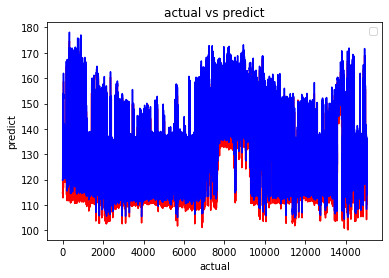

In [258]:
plt.plot(y,color = 'red')
plt.plot(y_predict, color = 'blue')
plt.title('actual vs predict')
plt.xlabel('actual')
plt.ylabel('predict')
plt.legend()
plt.show()

No handles with labels found to put in legend.


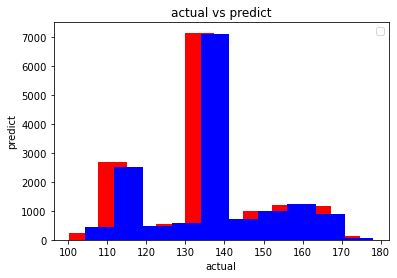

In [259]:
plt.hist(y,color = 'red')
plt.hist(y_predict, color = 'blue')
plt.title('actual vs predict')
plt.xlabel('actual')
plt.ylabel('predict')
plt.legend()
plt.show()

###   There is no much difference between actual vs predicted as they are almost overlapping with each other.